In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare

In [2]:
filepath = "../data_preparation/meta/auto_contours_review_processed.xlsx"
regions = ["bowel_bag", "bladder", "hip", "rectum"]

In [3]:
patient_list = [1, 3, 6, 8]
all_df = []
for patient_id in patient_list:
	df = pd.read_excel(filepath, sheet_name="Patient{0:03d}".format(patient_id))
	print(len(df))
	all_df.append(df)

df_raw = pd.concat(all_df)
print(df_raw.head())


22
22
22
22
   index  slice_no direction  slice_coordinate  manual_bowel_bag  \
0      1        48         I                81               NaN   
1      2        52         I                71               NaN   
2      3        56         I                61               3.0   
3      4        60         I                51               3.0   
4      5        64         I                41               3.0   

   manual_bladder  manual_hip  manual_rectum  auto_bowel_bag  auto_bladder  \
0             NaN         NaN            NaN             NaN           NaN   
1             2.0         NaN            NaN             NaN           1.0   
2             1.0         2.0            NaN             1.0           1.0   
3             2.0         1.0            1.0             2.0           2.0   
4             2.0         1.0            1.0             1.0           2.0   

   auto_hip  auto_rectum  
0       NaN          NaN  
1       NaN          NaN  
2       1.0          NaN  
3 

In [4]:
frequency_counts = {}
for region in regions:
	df_region = df_raw[[f"manual_{region}", f"auto_{region}"]]
	df_region = df_region.dropna(axis=0, how="all")
	frequency_counts[f"auto_{region}"] = df_region[f"auto_{region}"].value_counts()
	frequency_counts[f"manual_{region}"] = df_region[f"manual_{region}"].value_counts()

df_frequency_counts = pd.DataFrame.from_dict(frequency_counts)
df_frequency_counts = df_frequency_counts.fillna(0)
df_frequency_counts.head()



,auto_bowel_bag,manual_bowel_bag,auto_bladder,manual_bladder,auto_hip,manual_hip,auto_rectum,manual_rectum
1.0,29,32,22.0,18.0,3.0,6.0,24,27.0
2.0,25,15,5.0,9.0,15.0,12.0,9,8.0
3.0,4,11,0.0,0.0,0.0,0.0,2,0.0


In [1]:
29+25+4

58

In [36]:
for region in regions:
	print(region)
	f_obs = df_frequency_counts[f"auto_{region}"].to_list()
	f_exp = df_frequency_counts[f"manual_{region}"].to_list()
	print(f"manual: {f_exp}, auto: {f_obs}")
	if region in ["bladder", "hip"]:
		f_obs, f_exp = f_obs[:2], f_exp[:2]
	chisq, p = chisquare(f_obs, f_exp)
	print(chisq, p)
	print("")

bowel_bag
manual: [32, 15, 11], auto: [29, 25, 4]
11.402462121212121 0.0033418489055896563

bladder
manual: [18.0, 9.0, 0.0], auto: [22.0, 5.0, 0.0]
2.6666666666666665 0.10247043485974942

hip
manual: [6.0, 12.0, 0.0], auto: [3.0, 15.0, 0.0]
2.25 0.13361440253771584

rectum
manual: [27.0, 8.0, 0.0], auto: [24, 9, 2]
inf 0.0



/export/scratch2/data/grewal/OAR_segmentation/.venv/lib64/python3.10/site-packages/scipy/stats/_stats_py.py:7166: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


## Plotting

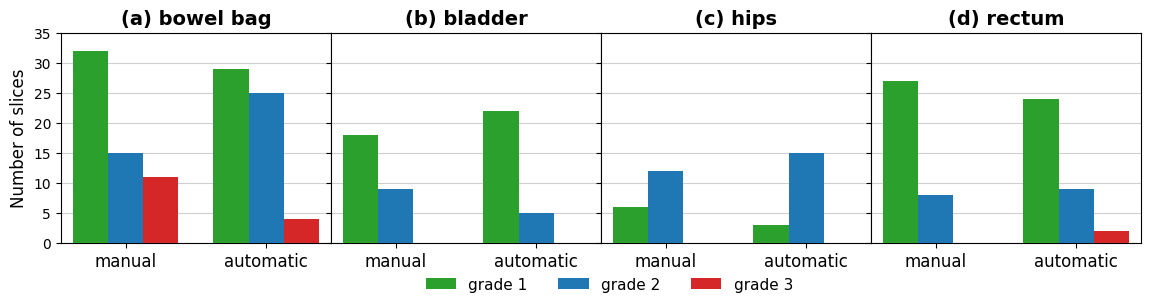

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3), sharex=False, sharey=True)
plt.subplots_adjust(0.05, 0.2, 0.95, 0.9, wspace=0.0)
cmap = matplotlib.colormaps["tab10"](np.linspace(0, 1, 10))
idx_to_letter = {0:'a', 1:'b', 2:'c', 3:'d'}

for i, region in enumerate(regions):
	ax1 = axes.ravel()[i]
	data = df_frequency_counts[[f"manual_{region}", f"auto_{region}"]].values
	x = [1, 5]
	ax1.bar(x, data[0, :], color=cmap[2], width=1, label="grade 1", zorder=3)
	x = [2, 6]
	ax1.bar(x, data[1, :], color=cmap[0], width=1, label="grade 2", zorder=3)
	x = [3, 7]
	ax1.bar(x, data[2, :], color=cmap[3], width=1, label="grade 3", zorder=3)

	if region=="bowel_bag":
		region = "bowel bag"
	if region=="hip":
		region = "hips"
	ax1.set_title(f"({idx_to_letter[i]}) {region}", fontweight="bold", fontsize=14)
	ax1.set_xticks([2, 6])
	ax1.set_xticklabels(["manual", "automatic"], fontsize=12)
	ax1.set_ylim([0, 35])
	ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
	if i==0:
		ax1.set_ylabel("Number of slices", fontsize=12)
	ax1.grid(axis='y', linestyle="-", zorder=0, alpha=0.6)
	if i==1:
		ax1.legend(loc='lower left', frameon=False, bbox_to_anchor=(0.3, -0.3, 0.1, 1), ncols=3, fontsize=11)

# plt.show()

fig.savefig('../outputs/clinical_acceptability.png', dpi=300)

In [15]:
cmap = matplotlib.colormaps["tab20"]
cmap(2)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)